Ej 1 y 4

In [2]:
import random
import numpy as np
from numpy.random import normal as noise
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as normal
from scipy.stats import norm
import linear_model.linear_model as lm
from linear_model.linear_model import BayesianLinearModel

In [3]:
def simular1(N=5000, do_x=None):
    # Si hay intervencion, usar x = do_x, sino generarlo del modelo original
    Z = np.random.uniform(-3,3, size=N)
    if do_x is None:
        X = 1 + 3*Z + 2*Z**3 + np.random.normal(size=N,scale=6)
    else:
        X = np.full(N, do_x)
    Y = -1 - 2*X + 6*Z**2 + np.random.normal(size=N,scale=1)
    return Z, X, Y

 # Generamos los datos sin intervenciones
N = 5000
Z1s, X1s, Y1s = simular1(N)
# Creamos el modelo
PHI1 = np.concatenate([
np.ones(N).reshape(N, 1), # c_0
X1s.reshape(N, 1), # c_x X
(Z1s**2).reshape(N, 1)], # c_z Z^2
axis=1)

# Ajustamos el modelo
blm1= BayesianLinearModel(basis=lambda x: x)
blm1.update(PHI1, Y1s.reshape(N,1) )

# Obtenemos las estimaciones
mean1 = blm1.location
cov1 = blm1.dispersion
ev1 = blm1.evidence()

In [12]:
mean1, cov1, ev1

(array([[-0.99155277],
        [-1.99990356],
        [ 5.99817142]]),
 array([[ 4.59122685e-04, -1.68713321e-07, -8.39546139e-05],
        [-1.68713321e-07,  2.85436209e-07, -4.33278563e-08],
        [-8.39546139e-05, -4.33278563e-08,  2.72345798e-05]]),
 np.float64(-7107.75242843502))

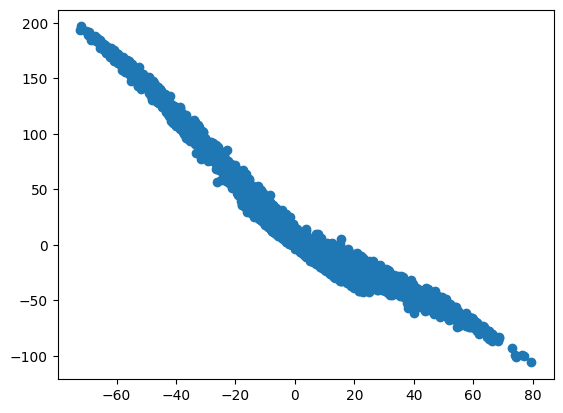

In [10]:
plt.scatter(X1s,Y1s)

queremos calcular P(y|do(x)) = sum_z P(y,z|do(x)) = sum_z P(y|do(x),z) P(z|do(x))   = sum_z P y | x,z   P z

In [ ]:
# y aprox w0 + w1 x + w2 z

#p(w | datos)

In [4]:
def p1_Y_doX(y,x,blm1=blm1,dz=0.01):
    # Backdoor
    # P(y) | do(x)) = int_z p(y|x,z) p(z) dz
    
    pz = 1/6 # p(z) = Uniforme(-3;3) = 1/6
    res = 0
    z_grilla = np.arange(-3,3+dz,dz)
    for z in z_grilla:
        _,_,py_xz = blm1.predict(X=np.array([1,x,z**2]).reshape((1,3)),
                            y=np.array([y]),
                            variance=True)
        res += py_xz * pz * dz


    return res



array([1.00166665])

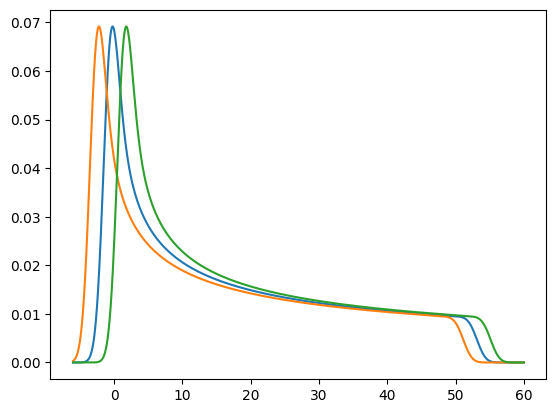

In [5]:
y_grilla = np.arange(-6,60,0.01)
plt.plot(y_grilla,p1_Y_doX(y_grilla,0))
plt.plot(y_grilla,p1_Y_doX(y_grilla,1))
plt.plot(y_grilla,p1_Y_doX(y_grilla,-1))

sum(p1_Y_doX(y_grilla,0)) * 0.01

medias

In [6]:
def media(py_dox, ys):
    dy = ys[1] - ys[0]
    return sum(py_dox[:,0] *ys) *dy

In [7]:
np.dot(y_grilla,p1_Y_doX(y_grilla,-1).reshape((6600,))) * 0.01,np.dot(y_grilla,p1_Y_doX(y_grilla,0).reshape((6600,))) * 0.01,np.dot(y_grilla,p1_Y_doX(y_grilla,1).reshape((6600,))) * 0.01

(np.float64(19.087108894873175),
 np.float64(17.084010850447832),
 np.float64(15.081477412234312))

In [10]:
y_grilla = np.arange(-20,80,0.01)
x_grilla = np.arange(-6,6,1)

media_backdoor = []
media_exp = []

for x in x_grilla:
    media_backdoor.append(media(p1_Y_doX(y_grilla,x),y_grilla))
    _,_,Yx = simular1(5000, x)
    media_exp.append(np.mean(Yx))

media_backdoor,media_exp


([np.float64(29.102600099066986),
  np.float64(27.09950187245994),
  np.float64(25.096403645853183),
  np.float64(23.093305419246303),
  np.float64(21.09020719263945),
  np.float64(19.087108966032606),
  np.float64(17.084010739425587),
  np.float64(15.080912512818733),
  np.float64(13.077814286211922),
  np.float64(11.07471605960501),
  np.float64(9.071617832998143),
  np.float64(7.0685196063912645)],
 [np.float64(28.697828439955057),
  np.float64(26.781400121743676),
  np.float64(25.061297653671463),
  np.float64(22.859755579108633),
  np.float64(21.17611961072107),
  np.float64(19.029476119540767),
  np.float64(16.943753065165104),
  np.float64(14.926160178892795),
  np.float64(12.778797581393395),
  np.float64(10.870437804876165),
  np.float64(8.654763029158042),
  np.float64(6.965893452057794)])

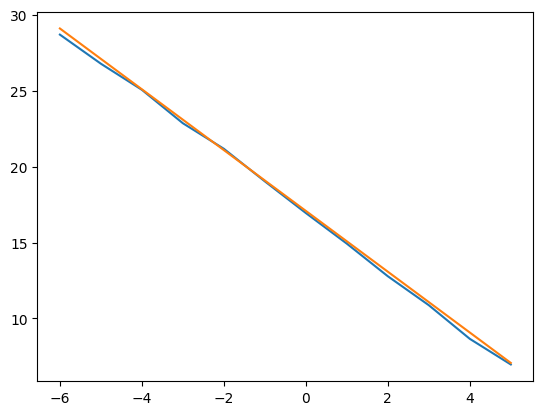

In [12]:
plt.plot(x_grilla,media_exp)
plt.plot(x_grilla,media_backdoor)